## **Data Loading and Preparation**

In [61]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [2]:
#data collection path
path = './Data/'
normal_data_path = './CIC-IDS-2018-Dataset-normal/'
abnormal_data_path = './CIC-IDS-2018-Dataset-abnormal/'

In [3]:
if not os.path.exists(path):
    try:
        os.makedirs(path,mode=0o777)
    except:
        print("folder exist")
if not os.path.exists(normal_data_path):
    try:
        os.makedirs(normal_data_path,mode=0o777)
    except:
        print("folder exist")

if not os.path.exists(abnormal_data_path):
    try:
        os.makedirs(abnormal_data_path,mode=0o777)
    except:
        print("folder exist")

In [4]:
def extract_data(path,file,export_path,idx,mode):
    set = pd.read_csv(path+file)
    if(mode=='normal'):
        set[set['Label']=='Benign'].to_csv(export_path+'IDS2018_Without_Abnormal'+"-"+str(idx)+'.csv')
    elif(mode=="abnormal"):
        set[set['Label']!='Benign'].to_csv(export_path+'IDS2018_Abnormal'+'-'+str(idx)+'.csv')
    else:
        print("mode = normal or abnormal")

In [5]:
filelist = os.listdir(path)
filelist

['.DS_Store',
 '02-14-2018.csv',
 '02-15-2018.csv',
 '02-21-2018.csv',
 '03-01-2018.csv',
 '03-02-2018.csv',
 '02-23-2018.csv',
 '02-22-2018.csv',
 '02-16-2018.csv',
 '02-28-2018.csv']

In [6]:
import os
filelist = os.listdir(path)
normal=[1,2,3, 4, 5, 6,7, 8,9 ] #file size of one file is too large，out of memory if loaded。
abnormal=[1,2,3, 4, 5, 6,7, 8,9 ]

In [7]:
for i in normal:
    print("Processing"+filelist[i]+"...")
    if(filelist[i]!='Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv'):
        extract_data(path,filelist[i],normal_data_path,i,'normal')

Processing02-14-2018.csv...
Processing02-15-2018.csv...
Processing02-21-2018.csv...
Processing03-01-2018.csv...
Processing03-02-2018.csv...
Processing02-23-2018.csv...
Processing02-22-2018.csv...
Processing02-16-2018.csv...
Processing02-28-2018.csv...


In [8]:
for i in abnormal:
    print("Processing"+filelist[i]+"...")
    extract_data(path,filelist[i],abnormal_data_path,i,'abnormal')

Processing02-14-2018.csv...
Processing02-15-2018.csv...
Processing02-21-2018.csv...
Processing03-01-2018.csv...
Processing03-02-2018.csv...
Processing02-23-2018.csv...
Processing02-22-2018.csv...
Processing02-16-2018.csv...
Processing02-28-2018.csv...


In [9]:
csv_output = 'data_files/'

In [10]:

all_normal_file = os.listdir(normal_data_path)
normal = pd.concat([pd.read_csv(normal_data_path+f) for f in all_normal_file])
normal.to_csv(csv_output + "combined_normal.csv", index=False)

In [11]:
normal_df = pd.read_csv(csv_output + "combined_normal.csv")

In [12]:
print(f'Normal Data Shape: {normal.shape}')

Normal Data Shape: (6112151, 81)


In [13]:
all_abnormal_file = os.listdir(abnormal_data_path)
abnormal = pd.concat([pd.read_csv(abnormal_data_path+f) for f in all_abnormal_file])
abnormal.to_csv(csv_output + "combined_abnormal.csv", index=False)

In [14]:
abnormal_df = pd.read_csv(csv_output + "combined_abnormal.csv")

In [15]:

print(f'Abnormal Data Shape: {abnormal_df.shape}')

Abnormal Data Shape: (2172103, 81)


### **Explore Normal Data**

In [17]:
normal_df.Label.value_counts()

Benign    6112151
Name: Label, dtype: int64

In [16]:

normal_df.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       '

In [18]:
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6112151 entries, 0 to 6112150
Data columns (total 81 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Dst Port           int64  
 2   Protocol           int64  
 3   Timestamp          object 
 4   Flow Duration      int64  
 5   Tot Fwd Pkts       int64  
 6   Tot Bwd Pkts       int64  
 7   TotLen Fwd Pkts    int64  
 8   TotLen Bwd Pkts    float64
 9   Fwd Pkt Len Max    int64  
 10  Fwd Pkt Len Min    int64  
 11  Fwd Pkt Len Mean   float64
 12  Fwd Pkt Len Std    float64
 13  Bwd Pkt Len Max    int64  
 14  Bwd Pkt Len Min    int64  
 15  Bwd Pkt Len Mean   float64
 16  Bwd Pkt Len Std    float64
 17  Flow Byts/s        float64
 18  Flow Pkts/s        float64
 19  Flow IAT Mean      float64
 20  Flow IAT Std       float64
 21  Flow IAT Max       float64
 22  Flow IAT Min       float64
 23  Fwd IAT Tot        float64
 24  Fwd IAT Mean       float64
 25  Fwd IAT Std       

In [ ]:
normal_df.isna().sum()

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 79, dtype: int64

### **Explore Abnormal Data**

In [20]:
abnormal_df = abnormal_df[abnormal_df['Label'] != 'Label']


In [21]:
abnormal_df.Label.value_counts()

DDOS attack-HOIC            686012
DoS attacks-Hulk            461912
Bot                         286191
FTP-BruteForce              193360
SSH-Bruteforce              187589
Infilteration               161934
DoS attacks-SlowHTTPTest    139890
DoS attacks-GoldenEye        41508
DoS attacks-Slowloris        10990
DDOS attack-LOIC-UDP          1730
Brute Force -Web               611
Brute Force -XSS               230
SQL Injection                   87
Name: Label, dtype: int64

In [25]:

abnormal_df.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio',
       '

In [26]:
abnormal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172044 entries, 0 to 2172102
Data columns (total 81 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Unnamed: 0         int64 
 1   Dst Port           object
 2   Protocol           object
 3   Timestamp          object
 4   Flow Duration      object
 5   Tot Fwd Pkts       object
 6   Tot Bwd Pkts       object
 7   TotLen Fwd Pkts    object
 8   TotLen Bwd Pkts    object
 9   Fwd Pkt Len Max    object
 10  Fwd Pkt Len Min    object
 11  Fwd Pkt Len Mean   object
 12  Fwd Pkt Len Std    object
 13  Bwd Pkt Len Max    object
 14  Bwd Pkt Len Min    object
 15  Bwd Pkt Len Mean   object
 16  Bwd Pkt Len Std    object
 17  Flow Byts/s        object
 18  Flow Pkts/s        object
 19  Flow IAT Mean      object
 20  Flow IAT Std       object
 21  Flow IAT Max       object
 22  Flow IAT Min       object
 23  Fwd IAT Tot        object
 24  Fwd IAT Mean       object
 25  Fwd IAT Std        object
 26  Fwd IAT Max   

In [ ]:
abnormal_df.isna().sum()

Dst Port         0
Protocol         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 79, dtype: int64

# **Prepare Data**

In [28]:
abnormal_df.drop(columns=['Unnamed: 0', 'Timestamp'], inplace=True)
normal_df.drop(columns=['Unnamed: 0', 'Timestamp'], inplace=True)

In [34]:
for col in abnormal_df.columns[:-1]:  # We exclude the last column using [:-1]
    abnormal_df[col] = pd.to_numeric(abnormal_df[col], errors='coerce')


In [35]:
abnormal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172044 entries, 0 to 2172102
Data columns (total 79 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    float64
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       float64
 20  Flow IAT Min       float64
 21  Fwd IAT Tot        float64
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        float64
 25  Fwd IAT Min       

In [36]:
# Concatenate abnormal_df and normal_df
df = pd.concat([abnormal_df, normal_df], ignore_index=True)

### **Plot Distribution of Labels in the Data**

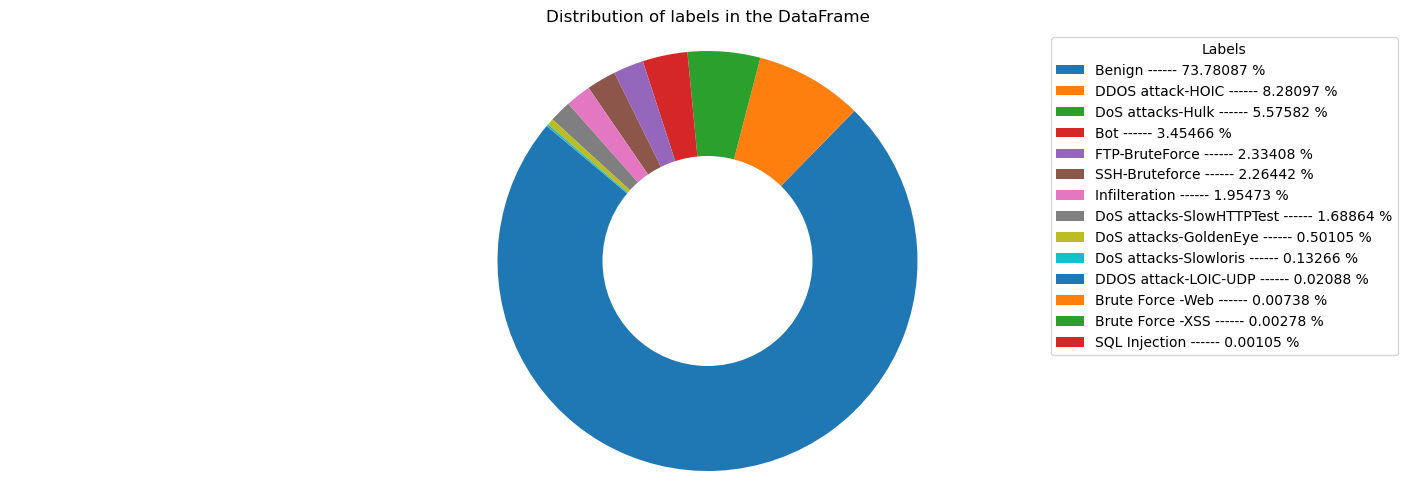

In [59]:

label_counts = df['Label'].value_counts() # Calculate the frequency of each label
plt.figure(figsize=(18,6))
patches, _ = plt.pie(label_counts, startangle=140)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Labels in the DataFrame')
plt.axis('equal')
labels = ['{0} ------ {1:1.5f} %'.format(i,j) for i,j in zip(label_counts.index, label_counts.values*100/label_counts.values.sum())]
plt.legend(patches, labels, title='Labels', loc='upper right')
plt.show()

In [60]:
df.to_csv('cleaned_data.csv')

In [ ]:
labels = [DDOS attack-HOIC , DoS attacks-Hulk , Bot , FTP-BruteForce , SSH-Bruteforce , Infilteration, DoS attacks-SlowHTTPT, DoS attacks-GoldenEye, DoS attacks-Slowloris, DDOS attack-LOIC-UDP , Brute Force -Web, Brute Force -XSS , SQL Injection]